In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# Definindo o caminho do arquivo CSV
file_path = '../data/spam_ham_dataset.csv'  # Ajuste se necessário

# Carregando o dataset
df = pd.read_csv(file_path)

# Exibindo as primeiras 5 linhas do dataset
df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
# Informações gerais sobre o dataset
df.info()

# Estatísticas básicas das colunas numéricas
df.describe()

# Contagem de cada tipo de rótulo (ham ou spam)
df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


label
ham     3672
spam    1499
Name: count, dtype: int64

C:\Users\Immortal\AppData\Local\Temp\ipykernel_10440\1847242062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


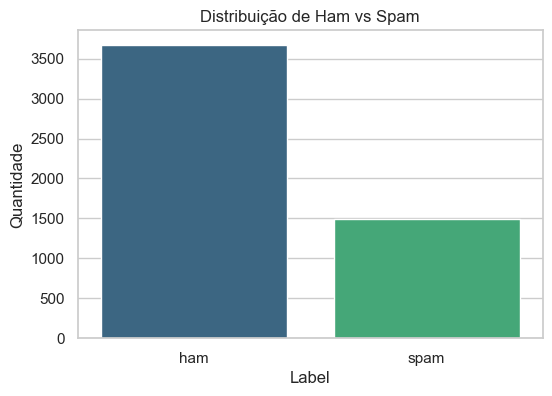

In [4]:
# Estilo do seaborn
sns.set(style="whitegrid")

# Gráfico de contagem de rótulos
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribuição de Ham vs Spam')
plt.xlabel('Label')
plt.ylabel('Quantidade')
plt.show()


In [5]:
# Criar nova coluna com o tamanho de cada mensagem
df['text_length'] = df['text'].apply(len)

# Ver as estatísticas dessa nova coluna
df['text_length'].describe()


count     5171.000000
mean      1048.391994
std       1528.513435
min         11.000000
25%        244.000000
50%        540.000000
75%       1237.000000
max      32258.000000
Name: text_length, dtype: float64

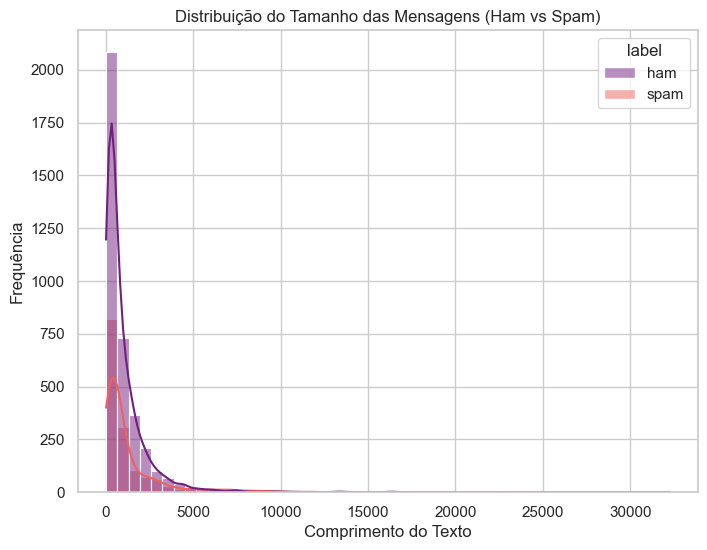

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True, palette='magma')
plt.title('Distribuição do Tamanho das Mensagens (Ham vs Spam)')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Frequência')
plt.show()


In [7]:
import string

# Função para limpar o texto
def clean_text(text):
    # Remove pontuações e coloca tudo em minúsculas
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

# Aplicando a limpeza
df['clean_text'] = df['text'].apply(clean_text)

# Exibir exemplo de como ficou
df[['text', 'clean_text']].head()


,text,clean_text
0,Subject: enron methanol ; meter # : 988291\r\n...,subject enron methanol meter 988291\r\nthis...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",subject hpl nom for january 9 2001\r\n see at...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",subject neon retreat\r\nho ho ho we re aroun...
3,"Subject: photoshop , windows , office . cheap ...",subject photoshop windows office cheap mai...
4,Subject: re : indian springs\r\nthis deal is t...,subject re indian springs\r\nthis deal is to ...


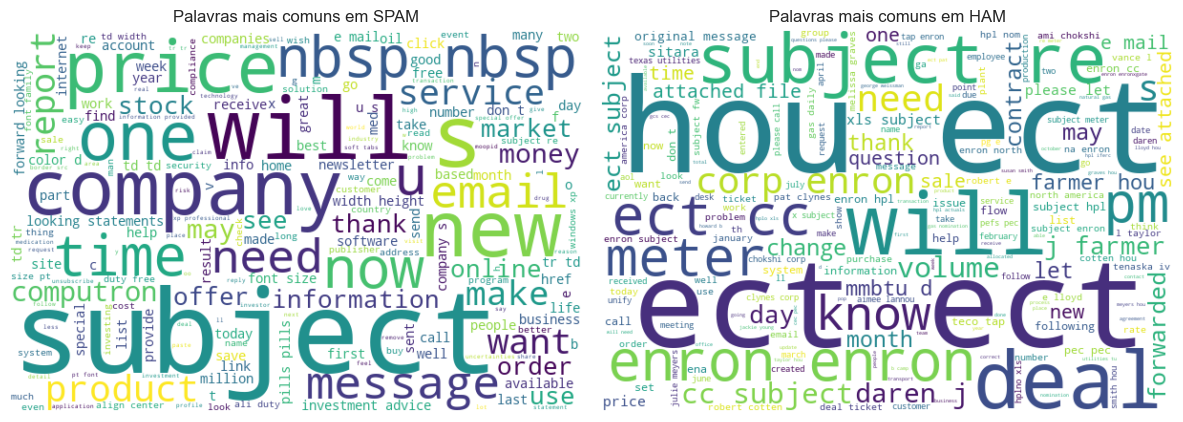

In [9]:
from wordcloud import WordCloud

# Separar os textos por rótulo
spam_words = ' '.join(df[df['label'] == 'spam']['clean_text'])
ham_words = ' '.join(df[df['label'] == 'ham']['clean_text'])

# Gerar nuvem de palavras
plt.figure(figsize=(12, 6))

# Spam
plt.subplot(1, 2, 1)
wc_spam = WordCloud(width=600, height=400, background_color='white').generate(spam_words)
plt.imshow(wc_spam, interpolation='bilinear')
plt.title('Palavras mais comuns em SPAM')
plt.axis('off')

# Ham
plt.subplot(1, 2, 2)
wc_ham = WordCloud(width=600, height=400, background_color='white').generate(ham_words)
plt.imshow(wc_ham, interpolation='bilinear')
plt.title('Palavras mais comuns em HAM')
plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Separar em features e rótulos
X = df['clean_text']
y = df['label_num']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Treinar modelo
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Fazer previsões
y_pred = model.predict(X_test_tfidf)

# Avaliar
print("Acurácia:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 0.9594202898550724
[[721  21]
 [ 21 272]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       742
           1       0.93      0.93      0.93       293

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [15]:
import os

# Criar a pasta 'app' no nível acima do notebooks
os.makedirs('../app', exist_ok=True)

# Salvar o modelo e vetorizador
import joblib
joblib.dump(model, '../app/model.pkl')
joblib.dump(vectorizer, '../app/vectorizer.pkl')


['../app/vectorizer.pkl']

In [18]:
# app/app.py

import joblib

# Carregar modelo e vetorizador
model = joblib.load("../app/model.pkl")
vectorizer = joblib.load("../app/vectorizer.pkl")

def predict_email(text):
    # Pré-processar e vetorização
    X = vectorizer.transform([text])
    prediction = model.predict(X)[0]
    return "SPAM" if prediction == 1 else "HAM (legítimo)"

# Loop interativo
if __name__ == "__main__":
    print("🛡️  Verificador de E-mails | Phishing Detector\n")
    while True:
        email = input("📧 Cole o conteúdo do e-mail (ou 'sair' para encerrar):\n\n> ")
        if email.lower() == "sair":
            break
        resultado = predict_email(email)
        print(f"\n🔍 Resultado: {resultado}\n{'-'*50}\n")


🛡️  Verificador de E-mails | Phishing Detector



In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd


In [6]:
# Carregar o dataset
data = pd.read_csv('../data/spam_ham_dataset.csv')
texts = data['text']
labels = data['label']

# Vetorização com TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(texts).toarray()

# Convertendo os rótulos em números
y = labels.map({'ham': 0, 'spam': 1}).values

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
print(data.columns)

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Converter os dados em tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Criar datasets e dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Definir o modelo
class SpamClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SpamClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return self.sigmoid(out)

# Inicializar o modelo
model = SpamClassifier(input_dim=X_train.shape[1])

# Função de perda e otimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Treinamento
for epoch in range(10):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Época {epoch+1}, Loss: {loss.item():.4f}")


Época 1, Loss: 0.2191
Época 2, Loss: 0.1539
Época 3, Loss: 0.0674
Época 4, Loss: 0.0023
Época 5, Loss: 0.0246
Época 6, Loss: 0.0174
Época 7, Loss: 0.0284
Época 8, Loss: 0.0201
Época 9, Loss: 0.0135
Época 10, Loss: 0.0159


In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Desativar gradientes para avaliação
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = (y_pred_probs > 0.5).int().squeeze()

# Converter para numpy para usar com scikit-learn
y_pred_np = y_pred.numpy()
y_test_np = y_test_tensor.squeeze().numpy()

# Acurácia e relatório de classificação
print("Acurácia:", accuracy_score(y_test_np, y_pred_np))
print("\nRelatório de Classificação:\n", classification_report(y_test_np, y_pred_np, target_names=["Ham", "Spam"]))


Acurácia: 0.9748792270531401

Relatório de Classificação:
               precision    recall  f1-score   support

         Ham       0.98      0.98      0.98       742
        Spam       0.95      0.96      0.96       293

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [9]:
# Salvar modelo treinado
torch.save(model.state_dict(), '../models/spam_model.pt')

# Salvar o vetor TF-IDF com pickle
import pickle
with open('../models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [10]:
# Exporte a classe do modelo em um arquivo Python
# Crie spam_model.py com isso:
import torch.nn as nn

class SpamClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SpamClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return self.sigmoid(out)
